# Assignment 3

## 1A. Factor Premiums and Factor Decay

In [286]:
import pandas as pd
import numpy as np
import warnings

pd.options.mode.chained_assignment = None 

# Suppress all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Read the monthly data CSV into a DataFrame and print the first and last few rows
df_factors = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name = 'FF - 3 factor returns', skiprows=4, nrows=1165, header=None, names=['Date', 'Mkt-RF', 'SMB', 'HML', 'RF'])

# Display the head and tail of the DataFrame
print(df_factors.head())
print(df_factors.tail())

     Date  Mkt-RF   SMB   HML    RF
0  192607    2.96 -2.56 -2.43  0.22
1  192608    2.64 -1.17  3.82  0.25
2  192609    0.36 -1.40  0.13  0.23
3  192610   -3.24 -0.09  0.70  0.32
4  192611    2.53 -0.10 -0.51  0.31
        Date  Mkt-RF   SMB   HML    RF
1160  202303    2.51 -5.51 -8.85  0.36
1161  202304    0.61 -3.35 -0.04  0.35
1162  202305    0.35  1.61 -7.72  0.36
1163  202306    6.46  1.54 -0.26  0.40
1164  202307    3.21  2.07  4.13  0.45


In [287]:
# Change the Date column to a datetime object and set it as the index
df_factors["Date"] = pd.to_datetime(df_factors["Date"], format='%Y%m')
df_factors["Date"] = df_factors["Date"].dt.to_period('M')
df_factors.set_index("Date", inplace=True)


# Print the first few rows of the modified DataFrame
df_factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31


In [288]:
# Filter the dataframe for the two time periods
df_1927_1992 = df_factors.loc['1927-01':'1992-12']
df_1993_2023 = df_factors.loc['1993-01':'2023-07']

factors = ['Mkt-RF', 'SMB', 'HML']

def t_stat(df, factors):
    t_stats_am = {}
    t_stats_gm = {}
    len_df = len(df)
    # t_stat = (mean - population_mean) / (std / sqrt(n))
    for factor in factors:
        # Calculate the t_stats from mean ( how to calculate populated mean ?) and standard deviation
        temp = df[factor]/100
        std_df = np.std(temp)
        se = std_df/np.sqrt(len_df)
        # https://www.investopedia.com/ask/answers/06/geometricmean.asp
        t_stats_am[factor] = np.mean(temp)/se
        t_stats_gm[factor] = (np.prod(1 + temp)**(1/len_df) - 1)/se
    return t_stats_am, t_stats_gm

# Calculate the t-statistic
t_stat_1927_1992_am, t_stat_1927_1992_gm = t_stat(df_1927_1992, factors)
t_stat_1993_2023_am, t_stat_1993_2023_gm = t_stat(df_1993_2023, factors)

print("T-Stats for 1927-1992")
print('\nWith Arithmetic Mean')
for key, value in t_stat_1927_1992_am.items():
    print(f'{key}: {value}')
    
print('\nWith Geometric Mean')
for key, value in t_stat_1927_1992_gm.items():
    print(f'{key}: {value}')
    
print("\nT-Stats for 1993-2023")
print('\nWith Arithmetic Mean')
for key, value in t_stat_1993_2023_am.items():
    print(f'{key}: {value}')

print('\nWith Geometric Mean')
for key, value in t_stat_1993_2023_gm.items():
    print(f'{key}: {value}')

T-Stats for 1927-1992

With Arithmetic Mean
Mkt-RF: 3.2205625120989674
SMB: 2.1271515550073685
HML: 3.335204505925686

With Geometric Mean
Mkt-RF: 2.417559767205432
SMB: 1.6993284993005768
HML: 2.8476094098455444

T-Stats for 1993-2023

With Arithmetic Mean
Mkt-RF: 3.095629461680783
SMB: 0.6002049027386961
HML: 0.8315327229762526

With Geometric Mean
Mkt-RF: 2.663414942119485
SMB: 0.2989505009916945
HML: 0.5108141399346273


In [289]:
# Read the monthly data CSV into a DataFrame and print the first few rows
df_returns_beta = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name = 'FF - portfolios sorted on beta', skiprows=16, nrows=721, header=None, names=['Date', 'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4' , 'Hi 20', 'Lo 10' , '02-Dec' , '03-Dec' , '04-Dec' ,'05-Dec' ,'06-Dec' , '07-Dec' , '08-Dec', '09-Dec' , 'Hi 10'])

df_returns_beta["Date"] = pd.to_datetime(df_returns_beta["Date"], format='%Y%m')
df_returns_beta["Date"] = df_returns_beta["Date"].dt.to_period('M')
df_returns_beta.set_index("Date", inplace=True)

# Convert the columns to numeric
df_returns_beta['Lo 10'] = pd.to_numeric(df_returns_beta['Lo 10'], errors='coerce')
df_returns_beta['Hi 10'] = pd.to_numeric(df_returns_beta['Hi 10'], errors='coerce')

# Calculate the beta spread
df_returns_beta['Beta Spread'] = df_returns_beta['Lo 10'] - df_returns_beta['Hi 10']

print(df_returns_beta[['Beta Spread']].head())



         Beta Spread
Date                
1963-07         2.13
1963-08        -6.95
1963-09         0.58
1963-10        -1.77
1963-11        -1.43


In [290]:
# Read the monthly data CSV into a DataFrame and print the first few rows
df_returns_mom = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name = 'FF - portfolios sorted on pmom', skiprows=11, nrows=1159, header=None, names=['Date', 'Lo PRIOR',	'PRIOR 2', 'PRIOR 3', 'PRIOR 4'	, 'PRIOR 5','PRIOR 6', 'PRIOR 7', 'PRIOR 8', 'PRIOR 9' , 'Hi PRIOR'])
df_returns_mom["Date"] = pd.to_datetime(df_returns_mom["Date"], format='%Y%m')
df_returns_mom["Date"] = df_returns_mom["Date"].dt.to_period('M')
df_returns_mom.set_index("Date", inplace=True)

df_returns_mom['Lo PRIOR'] = pd.to_numeric(df_returns_mom['Lo PRIOR'], errors='coerce')
df_returns_mom['Hi PRIOR'] = pd.to_numeric(df_returns_mom['Hi PRIOR'], errors='coerce')

df_returns_mom['Momentum Spread'] = df_returns_mom['Hi PRIOR'] - df_returns_mom['Lo PRIOR']

print(df_returns_mom[[ 'Momentum Spread']].head())

         Momentum Spread
Date                    
1927-01             3.08
1927-02            -0.52
1927-03             8.70
1927-04             3.45
1927-05             3.60


## 1C. Benefits of factor diversification

In [291]:
# Read the monthly data CSV into a DataFrame and print the first and last few rows
us_msci_ff_data = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name= 'MSCI - factor totret index', skiprows=7, nrows=344, header=None, names=['Date', 'Standard', 'Value Standard', 'Minimum Volatility', 'Equal Weighted', 'Momentum Standard'], parse_dates=['Date'])

us_msci_ff_data["Date"] = pd.to_datetime(us_msci_ff_data["Date"], format='%Y%m')
us_msci_ff_data["Date"] = us_msci_ff_data["Date"].dt.to_period('M')
us_msci_ff_data.set_index('Date', inplace=True)

# Convert relevant columns to numeric types
columns = ['Standard', 'Value Standard', 'Minimum Volatility', 'Equal Weighted', 'Momentum Standard']
for column in columns:
    us_msci_ff_data[column] = us_msci_ff_data[column].str.replace(',', '')
    us_msci_ff_data[column] = pd.to_numeric(us_msci_ff_data[column], errors='coerce')
    us_msci_ff_data[column + ' Return'] = us_msci_ff_data[column].pct_change()

us_msci_ff_data.dropna()

us_msci_ff_data['Multi Factor Index Return'] = (us_msci_ff_data['Value Standard Return'] + us_msci_ff_data['Minimum Volatility Return'] + us_msci_ff_data['Equal Weighted Return'] + us_msci_ff_data['Momentum Standard Return'])/4

# Define the start and end dates
start_date = '1995-01'
end_date = '2023-07'

# Filter the DataFrame based on the date range using the index
df_factors_filtered = df_factors.loc[start_date:end_date]

terms = len(df_factors_filtered)

annualized_data = {}
columns.append('Multi Factor Index')

print('Annualized Returns','\n')
# Calculate the annualized returns for the columns
for column in columns:
    annualized_return = ((1 + us_msci_ff_data[column + ' Return']).prod()**(12/terms) )- 1
    annualized_data[column + ' Return'] = annualized_return
    print(f'{column}: {annualized_return:.4f} = {annualized_return*100:.2f}%')
    

# Calculate the annualized risk-free rate
annualized_rf = ((1 + df_factors_filtered['RF']/100).prod()**(12/terms)) - 1
annualized_data['Risk Free Rate'] = annualized_rf

print(f'Risk-free rate: {annualized_rf:.4f} = {annualized_rf*100:.2f}%','\n')

print('Sharpe Ratios','\n')

sharpe_ratio = {}
for column in columns:
    sharpe_ratio[column + ' Return'] = (annualized_data[column + ' Return'] - annualized_rf) / (us_msci_ff_data[column + ' Return'].std()*np.sqrt(12))
    print(f'{column}: {sharpe_ratio[column + ' Return']:.4f}')
    


Annualized Returns 

Standard: 0.1049 = 10.49%
Value Standard: 0.0905 = 9.05%
Minimum Volatility: 0.1013 = 10.13%
Equal Weighted: 0.1082 = 10.82%
Momentum Standard: 0.1272 = 12.72%
Multi Factor Index: 0.1082 = 10.82%
Risk-free rate: 0.0218 = 2.18% 

Sharpe Ratios 

Standard: 0.5379
Value Standard: 0.4497
Minimum Volatility: 0.6569
Equal Weighted: 0.5042
Momentum Standard: 0.6446
Multi Factor Index: 0.6000


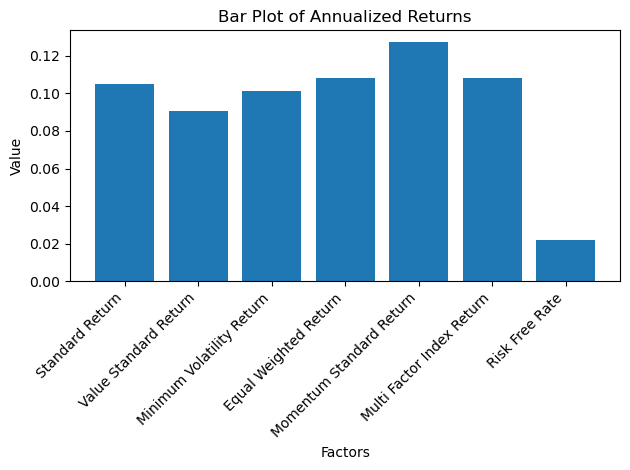

In [292]:
import matplotlib.pyplot as plt

# Create bar plot
plt.bar(annualized_data.keys(), annualized_data.values())

# Add labels and title
plt.xlabel('Factors')
plt.ylabel('Value')
plt.title('Bar Plot of Annualized Returns')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show plot
plt.show()


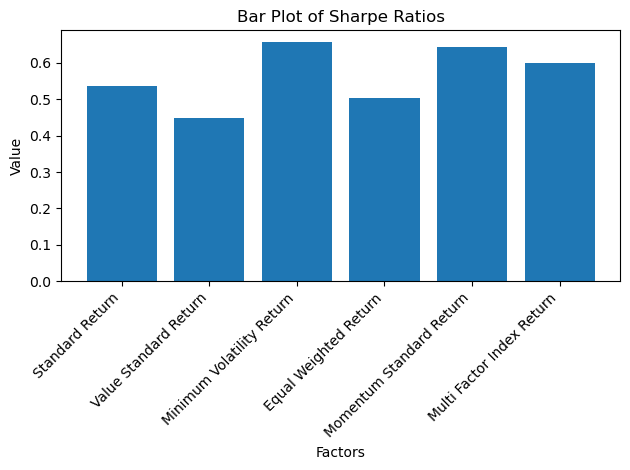

In [293]:
# Create bar plot
plt.bar(sharpe_ratio.keys(), sharpe_ratio.values())

# Add labels and title
plt.xlabel('Factors')
plt.ylabel('Value')
plt.title('Bar Plot of Sharpe Ratios')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show plot
plt.show()

## 1D. Sensitivity of factor returns to factor portfolio construction



In [294]:
# Filter the Fama-French data based on the date range
ff_data = df_factors.loc[start_date:end_date]
ff_data['MOM'] = df_returns_mom.loc[start_date:end_date][['Momentum Spread']]
ff_data['BAB'] = df_returns_beta.loc[start_date:end_date][['Beta Spread']]

print(ff_data.head())



# Calculate the spread of the 4 individual smart-beta strategies over the broad USA equity market index
us_msci_ff_data['Value Spread'] = us_msci_ff_data['Value Standard Return'] - us_msci_ff_data['Standard Return']
us_msci_ff_data['Minimum Volatility Spread'] = us_msci_ff_data['Minimum Volatility Return'] - us_msci_ff_data['Standard Return']
us_msci_ff_data['Equal Weighted Spread'] = us_msci_ff_data['Equal Weighted Return'] - us_msci_ff_data['Standard Return']
us_msci_ff_data['Momentum Spread'] = us_msci_ff_data['Momentum Standard Return'] - us_msci_ff_data['Standard Return']

us_msci_ff_data.dropna()

# Calculate the correlation of each of those four factor spreads to each of the four Fama-French monthly return spreads
correlation_matrix = pd.DataFrame(index=['Value Spread', 'Minimum Volatility Spread', 'Equal Weighted Spread', 'Momentum Spread'],
                                  columns=['HML', 'SMB', 'MOM', 'BAB'])

correlation_matrix.loc['Value Spread', 'HML'] = us_msci_ff_data['Value Spread'].corr(ff_data['HML'])
correlation_matrix.loc['Value Spread', 'SMB'] = us_msci_ff_data['Value Spread'].corr(ff_data['SMB'])
correlation_matrix.loc['Value Spread', 'MOM'] = us_msci_ff_data['Value Spread'].corr(ff_data['MOM'])
correlation_matrix.loc['Value Spread', 'BAB'] = us_msci_ff_data['Value Spread'].corr(ff_data['BAB'])


correlation_matrix.loc['Minimum Volatility Spread', 'HML'] = us_msci_ff_data['Minimum Volatility Spread'].corr(ff_data['HML'])
correlation_matrix.loc['Minimum Volatility Spread', 'SMB'] = us_msci_ff_data['Minimum Volatility Spread'].corr(ff_data['SMB'])
correlation_matrix.loc['Minimum Volatility Spread', 'MOM'] = us_msci_ff_data['Minimum Volatility Spread'].corr(ff_data['MOM'])
correlation_matrix.loc['Minimum Volatility Spread', 'BAB'] = us_msci_ff_data['Minimum Volatility Spread'].corr(ff_data['BAB'])


correlation_matrix.loc['Equal Weighted Spread', 'HML'] = us_msci_ff_data['Equal Weighted Spread'].corr(ff_data['HML'])
correlation_matrix.loc['Equal Weighted Spread', 'SMB'] = us_msci_ff_data['Equal Weighted Spread'].corr(ff_data['SMB'])
correlation_matrix.loc['Equal Weighted Spread', 'MOM'] = us_msci_ff_data['Equal Weighted Spread'].corr(ff_data['MOM'])
correlation_matrix.loc['Equal Weighted Spread', 'BAB'] = us_msci_ff_data['Equal Weighted Spread'].corr(ff_data['BAB'])


correlation_matrix.loc['Momentum Spread', 'HML'] = us_msci_ff_data['Momentum Spread'].corr(ff_data['HML'])
correlation_matrix.loc['Momentum Spread', 'SMB'] = us_msci_ff_data['Momentum Spread'].corr(ff_data['SMB'])
correlation_matrix.loc['Momentum Spread', 'MOM'] = us_msci_ff_data['Momentum Spread'].corr(ff_data['MOM'])
correlation_matrix.loc['Momentum Spread', 'BAB'] = us_msci_ff_data['Momentum Spread'].corr(ff_data['BAB'])

print(correlation_matrix)

         Mkt-RF   SMB   HML    RF   MOM   BAB
Date                                         
1995-01    1.80 -3.50  2.57  0.42 -3.46  1.22
1995-02    3.63 -0.66  1.08  0.40  1.14 -2.72
1995-03    2.19 -0.16 -2.15  0.46  3.60  0.63
1995-04    2.11 -0.49  1.71  0.44  1.94  3.09
1995-05    2.90 -2.55  2.29  0.54 -0.11 -0.59
                                HML       SMB       MOM       BAB
Value Spread                0.72832 -0.177026 -0.243478  0.414829
Minimum Volatility Spread  0.231505 -0.306972  0.303188  0.814676
Equal Weighted Spread      0.430786  0.321624 -0.448468 -0.199402
Momentum Spread            -0.22251  0.079246  0.642596   0.14025


## 2A. Data cleaning and validation

In [295]:
df_stocks_data = pd.read_csv('class project data (part 2 - factor portfolio construction).csv' , usecols=['stock_id', 'date','Pb', 'R1M_Usd', 'Bv', 'Mkt_Cap_3M_Usd'], parse_dates=['date'])       # Load the data
df_stocks_data['date'] = pd.to_datetime(df_stocks_data['date'])       # Convert the date column to datetime format
df_stocks_data['date'] = df_stocks_data['date'] + pd.Timedelta(days=1) # Add a day to the date
df_stocks_data['date'] = df_stocks_data['date'].dt.to_period('M')       # Convert the date column to period format
date_counts = df_stocks_data['date'].value_counts()


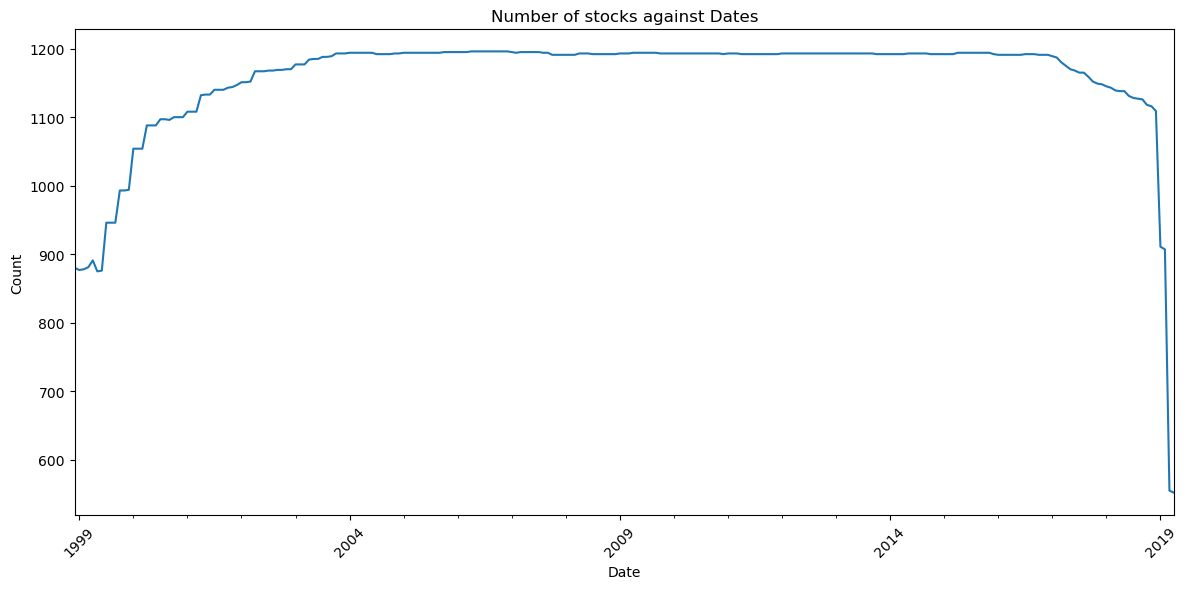

In [296]:
import matplotlib.pyplot as plt

date_counts = date_counts.sort_index()

# Plot the counts
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Number of stocks against Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [297]:
from scipy.stats.mstats import winsorize

# Calculate basic statistics
basic_stats = df_stocks_data['R1M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

# Winsorize the counts
df_stocks_data['R1M_Usd_winsorized'] = winsorize(df_stocks_data['R1M_Usd'], limits=[0.005, 0.005])

print(df_stocks_data['R1M_Usd_winsorized'].describe())

# Find max and min values
max_value = np.max(df_stocks_data['R1M_Usd_winsorized'])
min_value = np.min(df_stocks_data['R1M_Usd_winsorized'])

R1M_counts_winsorized = pd.Series(df_stocks_data['R1M_Usd_winsorized']).value_counts().sort_index()

R1M_counts_original = df_stocks_data['R1M_Usd'].value_counts().sort_index()

count    283380.000000
mean          0.012633
std           0.177877
min          -0.922000
25%          -0.044000
50%           0.011000
75%           0.064000
max          30.176000
Name: R1M_Usd, dtype: float64
count    283380.000000
mean          0.010709
std           0.110137
min          -0.418000
25%          -0.044000
50%           0.011000
75%           0.064000
max           0.458000
Name: R1M_Usd_winsorized, dtype: float64


c:\Users\saiki\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


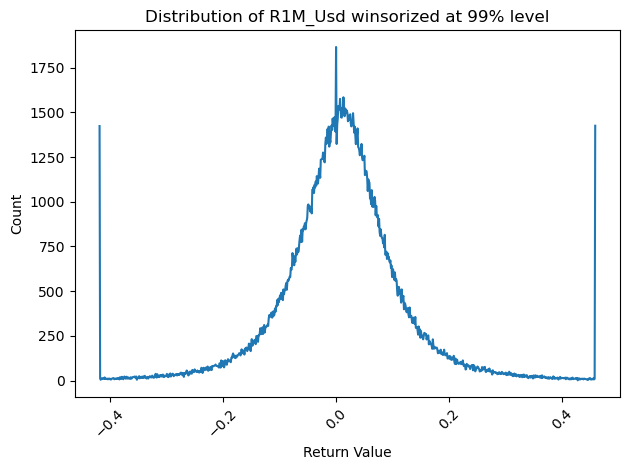

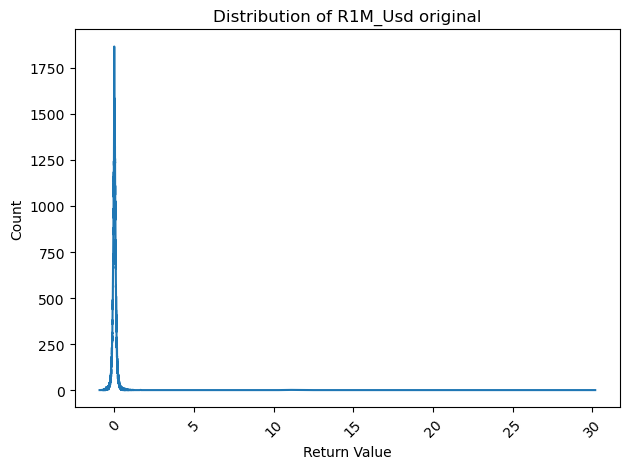

In [298]:
plt.figure()
R1M_counts_winsorized.plot()
plt.title('Distribution of R1M_Usd winsorized at 99% level')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
R1M_counts_original.plot()
plt.title('Distribution of R1M_Usd original')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

date
1998-12    100.0
1999-01    100.0
1999-02    100.0
1999-03    100.0
1999-04    100.0
Freq: M, dtype: float64


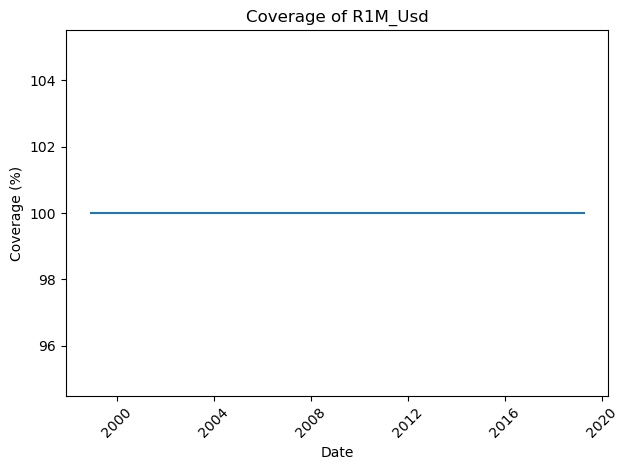

In [299]:
# Calculate the percentage of non-missing values for each return data field

coverage = df_stocks_data.groupby('date')['R1M_Usd'].count() / df_stocks_data.groupby('date')['stock_id'].count() * 100

print(coverage.head())

# Plot the coverage

plt.figure()
plt.plot(coverage.index.to_timestamp(), coverage.values)
plt.title('Coverage of R1M_Usd')
plt.xlabel('Date')
plt.ylabel('Coverage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



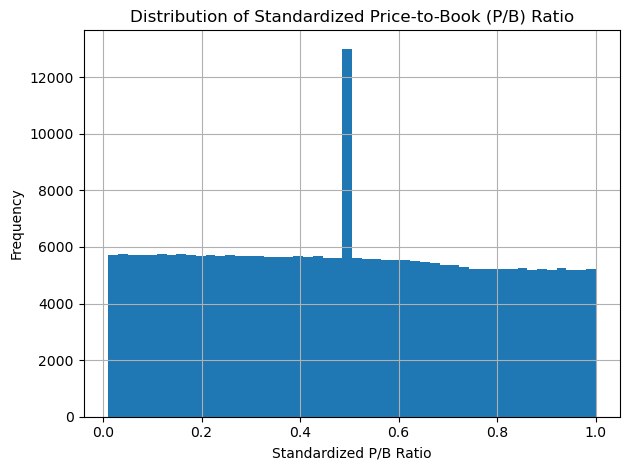

Standout P/B values: 0         0.5
1         0.5
2         0.5
3         0.5
4         0.5
         ... 
283015    0.5
283016    0.5
283122    0.5
283123    0.5
283124    0.5
Name: Pb, Length: 10197, dtype: float64
Correlation between standardized P/B multiplied by Book value standardized and Market cap standardized: 0.7834402550171304


In [300]:
plt.figure()
df_stocks_data['Pb'].hist(bins=50)
plt.title('Distribution of Standardized Price-to-Book (P/B) Ratio')
plt.xlabel('Standardized P/B Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Identify any standout values
standout_values = df_stocks_data['Pb'][df_stocks_data['Pb'] == 0.5] 
print(f"Standout P/B values: {standout_values}")

# Perform a sanity check to ensure the P/B value is indeed the ratio between market cap and book value
# Since the fields are standardized, we can check the correlation between the standardized P/B ratio multiplied by Book value and standardized market cap
df_stocks_data['Mkt_Cap_temp'] = (df_stocks_data['Pb'] * df_stocks_data['Bv'])
correlation = df_stocks_data[['Mkt_Cap_temp', 'Mkt_Cap_3M_Usd']].corr().iloc[0, 1]

print(f"Correlation between standardized P/B multiplied by Book value standardized and Market cap standardized: {correlation}")

In [301]:

# Filter the data to include only dates from January 1998 to December 2018
start_date = pd.Period('1999-01', freq='M')
end_date = pd.Period('2018-12', freq='M')
df_stocks_data_period = df_stocks_data[(df_stocks_data['date'] >= start_date) & (df_stocks_data['date'] <= end_date)]

# Calculate the weighted return for each stock in each period
weighted_return = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd_winsorized'], weights= x['Mkt_Cap_3M_Usd']))

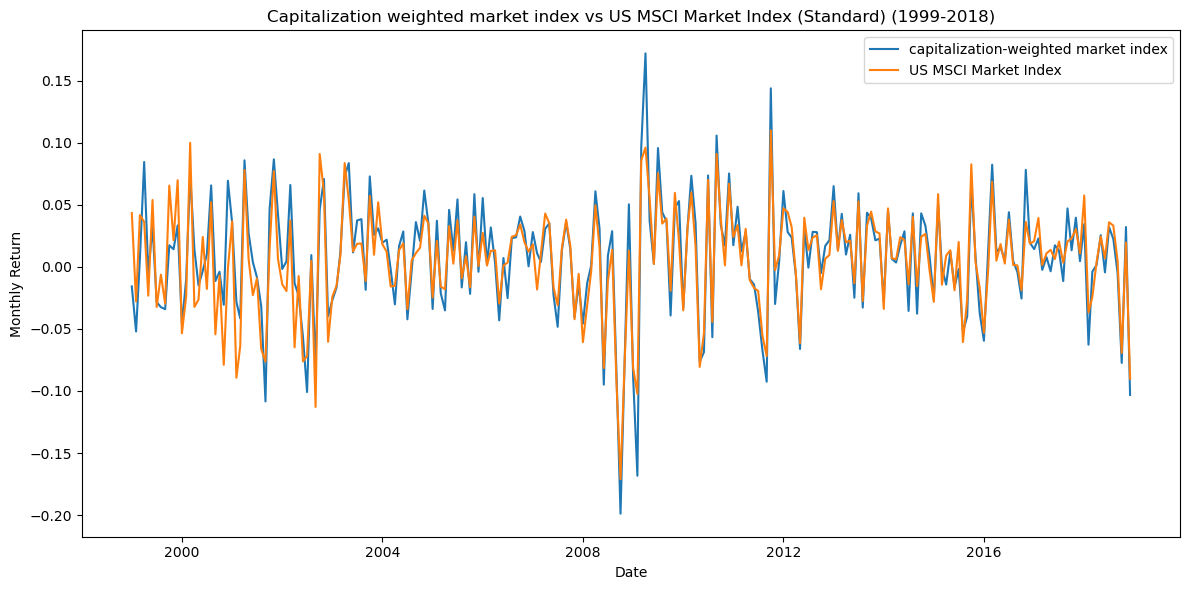

In [302]:
# Plot the monthly returns for the MSCI USA market index
us_msci_ff_filtered_data = us_msci_ff_data['1999-01':'2018-12']
plt.figure(figsize=(12, 6))
plt.plot(weighted_return.index.to_timestamp(), weighted_return, label='capitalization-weighted market index')
plt.plot(us_msci_ff_filtered_data.index.to_timestamp(), us_msci_ff_filtered_data['Standard Return'], label='US MSCI Market Index')
plt.title('Capitalization weighted market index vs US MSCI Market Index (Standard) (1999-2018)')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.tight_layout()
plt.show()

In [303]:
# print(difference.describe())

# calculate the correlation between the two portfolios

correlation = weighted_return.corr(us_msci_ff_filtered_data['Standard Return'])

print(f"Correlation between US MSCI Market Index and capitalization-weighted market index : {correlation}")


Correlation between US MSCI Market Index and capitalization-weighted market index : 0.9095443871446064


In [304]:
# Equally weight the top 20% of stocks by their book-to-price ratio

# As Pb is already standardized, we can use the raw Pb values to filter the top 20% of stocks
pb_filt_eq_wt_data = df_stocks_data_period[df_stocks_data_period['Pb'] < 0.2]

ret_filtered_eq_wt = pb_filt_eq_wt_data.groupby('date')['R1M_Usd_winsorized'].mean()

terms = len(ret_filtered_eq_wt)

annualized_return_eq_wt = (1 + ret_filtered_eq_wt).cumprod().iloc[-1]**(12/terms) - 1

annualized_std_eq_wt = ret_filtered_eq_wt.std() * np.sqrt(12)

In [305]:
# Weight stocks in proportion to the provided standardized (percentiled) exposure to the book-to-price ratio.
df_stocks_data_period.loc[:,'Bp_wt'] = 1 - df_stocks_data_period['Pb']

# Group by weight (1-Pb), pb are already standardized
ret_filtered_bp_wt = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd_winsorized'], weights=x['Bp_wt']))

annualized_return_bp_wt = (1 + ret_filtered_bp_wt).cumprod().iloc[-1]**(12/terms) - 1

annualized_std_bp_wt = ret_filtered_bp_wt.std() * np.sqrt(12)


In [306]:
# Weight stocks in proportion to the provided standardized (percentiled) exposure to the book-to-price ratio TIMES their provided standardized market cap.
df_stocks_data_period.loc[:,'Bp_Mktcap_wt'] = df_stocks_data_period['Bp_wt']*df_stocks_data_period['Mkt_Cap_3M_Usd']

# Group by weight (1-Pb)*Mkt_Cap
ret_filtered_bp_mktcap_wt = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd_winsorized'], weights=x['Bp_Mktcap_wt']))


annualized_return_bp_mktcap_wt = (1 + ret_filtered_bp_mktcap_wt).cumprod().iloc[-1]**(12/terms) - 1

annualized_std_bp_mktcap_wt = ret_filtered_bp_mktcap_wt.std() * np.sqrt(12)


In [307]:
print(f"Annualized return for equally weighted portfolio: {annualized_return_eq_wt:.4f} = {annualized_return_eq_wt*100:.2f}%")
print(f"Annualized return for Bp weighted portfolio: {annualized_return_bp_wt:.4f} = {annualized_return_bp_wt*100:.2f}%")
print(f"Annualized return for Bp*MktCap weighted portfolio: {annualized_return_bp_mktcap_wt:.4f} = {annualized_return_bp_mktcap_wt*100:.2f}%")

print(f"Annualized standard deviation for equally weighted portfolio: {annualized_std_eq_wt:.4f} = {annualized_std_eq_wt*100:.2f}%")
print(f"Annualized standard deviation for Pb weighted portfolio: {annualized_std_bp_wt:.4f} = {annualized_std_bp_wt*100:.2f}%")
print(f"Annualized standard deviation for Pb*MktCap weighted portfolio: {annualized_std_bp_mktcap_wt:.4f} = {annualized_std_bp_mktcap_wt*100:.2f}%")


Annualized return for equally weighted portfolio: 0.1692 = 16.92%
Annualized return for Bp weighted portfolio: 0.1292 = 12.92%
Annualized return for Bp*MktCap weighted portfolio: 0.0958 = 9.58%
Annualized standard deviation for equally weighted portfolio: 0.2053 = 20.53%
Annualized standard deviation for Pb weighted portfolio: 0.1792 = 17.92%
Annualized standard deviation for Pb*MktCap weighted portfolio: 0.1689 = 16.89%


In [308]:
last_period_date = '2018-09'
df_last_period = df_stocks_data_period[df_stocks_data_period["date"] == last_period_date]

# Calculate the number of stocks in the last period for all portfolios
num_stocks_Mktcap_Bp_wt = len(df_last_period)
num_stocks_Bp_wt = len(df_last_period)
num_stocks_eq_wt = len(df_last_period[df_last_period['Pb'] < 0.2])

# Calculate the portfolio weights for each stock in the last period
df_last_period['Bp_wt'] = 1 - df_last_period['Pb']
df_last_period['Mktcap_Bp_Weighted_Return'] = df_last_period['Mkt_Cap_3M_Usd'] * df_last_period['Bp_wt']

# Group by date and calculate the sum of weights for last period
Bp_weights_sum = df_last_period['Bp_wt'].sum()
Mktcap_Bp_weights_sum = df_last_period['Mktcap_Bp_Weighted_Return'].sum()

# Normalize the weights
df_last_period['Bp_wt_norm'] = df_last_period['Bp_wt'] / Bp_weights_sum

df_last_period['Mktcap_Bp_wt_norm'] = df_last_period['Mktcap_Bp_Weighted_Return'] / Mktcap_Bp_weights_sum

In [309]:
# Identify the portfolio with the least number of stocks and the highest single-stock weight

print(f"Number of stocks in MktCap BP Weight Portfolio: {num_stocks_Mktcap_Bp_wt}")
print(f"Number of stocks in BP Weight Portfolio: {num_stocks_Bp_wt}")
print(f"Number of stocks in equal weighted portfolio: {num_stocks_eq_wt}")

print(f"Highest single-stock weight in BP Weight Portfolio: {df_last_period['Bp_wt_norm'].max():.4f}")
print(f"Highest single-stock weight in MktCap BP Weight Portfolio: {df_last_period['Mktcap_Bp_wt_norm'].max():.4f}")
print(f"Highest single-stock weight in equal weighted portfolio: {1/len(df_last_period):.4f}")

Number of stocks in MktCap BP Weight Portfolio: 1126
Number of stocks in BP Weight Portfolio: 1126
Number of stocks in equal weighted portfolio: 222
Highest single-stock weight in BP Weight Portfolio: 0.0017
Highest single-stock weight in MktCap BP Weight Portfolio: 0.0038
Highest single-stock weight in equal weighted portfolio: 0.0009


## 2D. Excess Returns 

In [310]:
combined_series = pd.concat([ret_filtered_eq_wt, ret_filtered_bp_wt, ret_filtered_bp_mktcap_wt, weighted_return ], axis=1)

combined_series.columns = ['Equally Weighted', 'Bp Weighted', 'Bp*MktCap Weighted', 'MktCap Weighted']

combined_series['Equally Weighted Excess'] = combined_series['Equally Weighted'] - combined_series['MktCap Weighted']
combined_series['Bp Weighted Excess'] = combined_series['Bp Weighted'] - combined_series['MktCap Weighted']
combined_series['Bp*MktCap Weighted Excess'] = combined_series['Bp*MktCap Weighted'] - combined_series['MktCap Weighted']

annualized_std_dev = combined_series[['Equally Weighted Excess', 'Bp Weighted Excess', 'Bp*MktCap Weighted Excess']].std() * np.sqrt(12)

print("Annualized Standard Deviation of the strategies over broad market cap weighted index")
print(annualized_std_dev)

Annualized Standard Deviation of the strategies over broad market cap weighted index
Equally Weighted Excess      0.084355
Bp Weighted Excess           0.045201
Bp*MktCap Weighted Excess    0.026588
dtype: float64


In [311]:
combined_series['HML'] = df_factors.loc['1999-01':'2018-11'][['HML']]

correlation_matrix = combined_series[['Equally Weighted Excess', 'Bp Weighted Excess', 'Bp*MktCap Weighted Excess', 'HML']].corr()
print("Correlation Matrix", correlation_matrix)

Correlation Matrix                            Equally Weighted Excess  Bp Weighted Excess  \
Equally Weighted Excess                   1.000000            0.950988   
Bp Weighted Excess                        0.950988            1.000000   
Bp*MktCap Weighted Excess                 0.771046            0.766655   
HML                                       0.593781            0.603273   

                           Bp*MktCap Weighted Excess       HML  
Equally Weighted Excess                     0.771046  0.593781  
Bp Weighted Excess                          0.766655  0.603273  
Bp*MktCap Weighted Excess                   1.000000  0.856963  
HML                                         0.856963  1.000000  
